<a href="https://colab.research.google.com/github/idnunez/MAT-421/blob/main/ModuleB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT421 Module B Part 2

Isaac Nunez

Section 17.4: Lagrange Polynomial Interpolation

Cubic spline interpolation, while precise, requires the formation of several cubic functions. The objective of Lagrange polynomial interpolation is to create a single polynomial to interpolate the data.

The polynomial created using a sum of polynomials for each given point, where each polynomial is equal to:

$F_{j}(x) = y_{j}\prod_{i\not =j}\frac{x-x_{i}}{x_{j}-x_{i}}$

This ensures that when $x = x_{j}$, the polynomial $F_{j}(x) = y_{j}$ and all other polynomials are equal to zero.

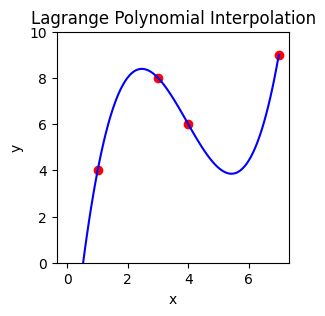

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import lagrange

x = [1, 3, 4, 7] #Example dataset that was used throughout part 1 of this module
y = [4, 8, 6, 9]

f = lagrange(x,y) #Finds the corresponding lagrange polynomials for each data point and adds them together to create the final lagrange polynomial

x_new = np.linspace(0,7,100)
y_new = f(x_new)

plt.figure(figsize = (3,3))
plt.plot(x,y,'ro')
plt.plot(x_new, y_new, 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0,10)
plt.title('Lagrange Polynomial Interpolation')
plt.show()

Section 17.5: Newton's Polynomial Interpolation

Another method for interpolating a function is Newton's Polynomial Interpolation. It is similar to Lagrange interpolation in that it involves the summation of several polynomials, however, it is much easier to add to the dataset due to new additions not affecting the previous terms.

The polynomial can be found with the formula:

$f(x) = \sum_{i=0}^{n}a_{n}n_{i}(x)$

Where $n_{i}(x) = \prod_{j=0}^{n-1}(x-x_{j})$

In order to find the terms for $a_{n}$, the procedure of divided differences is used, which is shown below:

In [5]:
def divided_diff(x, y):
  '''
  function to calculate the divided
  differences table
  '''
  n = len(y)
  coef = np.zeros([n, n])
  # the first column is y
  coef[:,0] = y

  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = \
      (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

  return coef

def newton_poly(coef, x_data, x):
  '''
  evaluate the newton polynomial
  at x
  '''
  n = len(x_data) - 1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k] + (x -x_data[n-k])*p
  return p

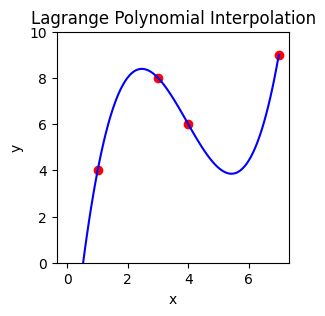

In [7]:
x = [1, 3, 4, 7] #Example dataset that was used throughout part 1 of this module
y = [4, 8, 6, 9]

coefs = divided_diff(x,y)[0,:]

x_new2 = np.linspace(0,7,100)
y_new2 = newton_poly(coefs, x, x_new2)

plt.figure(figsize = (3,3))
plt.plot(x,y,'ro')
plt.plot(x_new2, y_new2, 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0,10)
plt.title('Lagrange Polynomial Interpolation')
plt.show()

NOTE: With both of these forms of interpolation, it is important to remain within the range of the dataset, since the function tends towards infinity on both ends and is thus inaccurate outside of that range.